# k-means clustering on digits 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans

digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [4]:
kmeans = KMeans(n_clusters=10, random_state=0, init='random', n_init=10)
clusters = kmeans.fit_predict(digits.data)
print(clusters.shape)
print(clusters)
kmeans.cluster_centers_.shape

(1797,)
[7 1 1 ... 1 8 8]


(10, 64)

(2, 5)


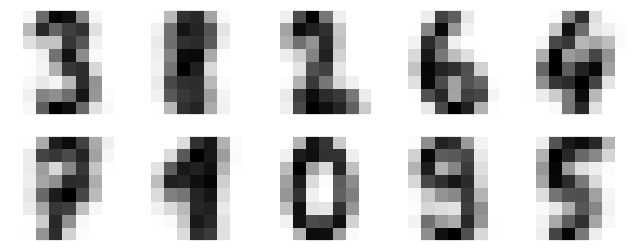

In [5]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
print(ax.shape)
centers = kmeans.cluster_centers_.reshape(10, 8, 8) #center.shape = (10,8,8)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap=plt.cm.binary)

In [15]:
from scipy.stats import mode

#for each cluster, we predict the most common label in the cluster
labels = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    #print(mask)
    labels[mask] = mode(digits.target[mask],keepdims=True)[0]

#compute the accuracy 
from sklearn.metrics import accuracy_score
accuracy_score(digits.target, labels)

0.7924318308291597

[[177   0   0   0   1   0   0   0   0   0]
 [  0  55  24   1   0   1   2   0  99   0]
 [  1   2 148  13   0   0   0   3   8   2]
 [  0   0   0 154   0   2   0   7   7  13]
 [  0   7   0   0 162   0   0   9   3   0]
 [  0   0   0   0   2 136   1   0   0  43]
 [  1   1   0   0   0   0 177   0   2   0]
 [  0   2   0   0   0   0   0 175   2   0]
 [  0   6   3   2   0   4   2   5 101  51]
 [  0  20   0   6   0   6   0   7   2 139]]


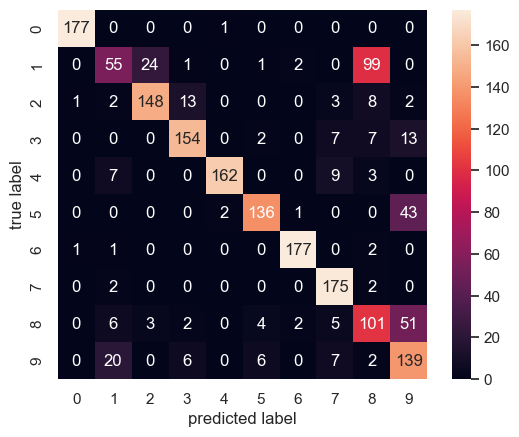

In [18]:
#plot the confusion matrix 
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(digits.target, labels)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=True, 
            yticklabels=digits.target_names,
            xticklabels=digits.target_names)
plt.ylabel('true label')
plt.xlabel('predicted label');